In [1]:
from neurodiffeq import diff
from neurodiffeq.conditions import IVP
from neurodiffeq.networks import FCNN
from neurodiffeq.solvers import Solver1D
from neurodiffeq.monitors import Monitor1D
from neurodiffeq.callbacks import MonitorCallback
from neurodiffeq.conditions import DirichletBVP2D
from neurodiffeq.solvers import Solver2D
from neurodiffeq.monitors import Monitor2D
from neurodiffeq.generators import Generator2D
from neurodiffeq.conditions import IBVP1D
from neurodiffeq.pde import make_animation
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1. 1st Order Linear ODE (IVP)

In [2]:
### Working Perfectly

### Equation is u = u_0*exp(l*t)

l = 0.5
u_0 = 0.1


def ode_exponential(u, t):
    return [diff(u, t) - l*u,]

condition = [IVP(t_0=0, u_0=u_0),]

net = [FCNN(
    n_input_units=1,
    n_output_units=1,
    hidden_units=(1024,1024),
    actv=torch.nn.Tanh
),]

solver_exponential = Solver1D(
    ode_system=ode_exponential,
    conditions=condition,
    t_min=0.0,
    t_max=5.0,
    nets=net
)

<IPython.core.display.Javascript object>


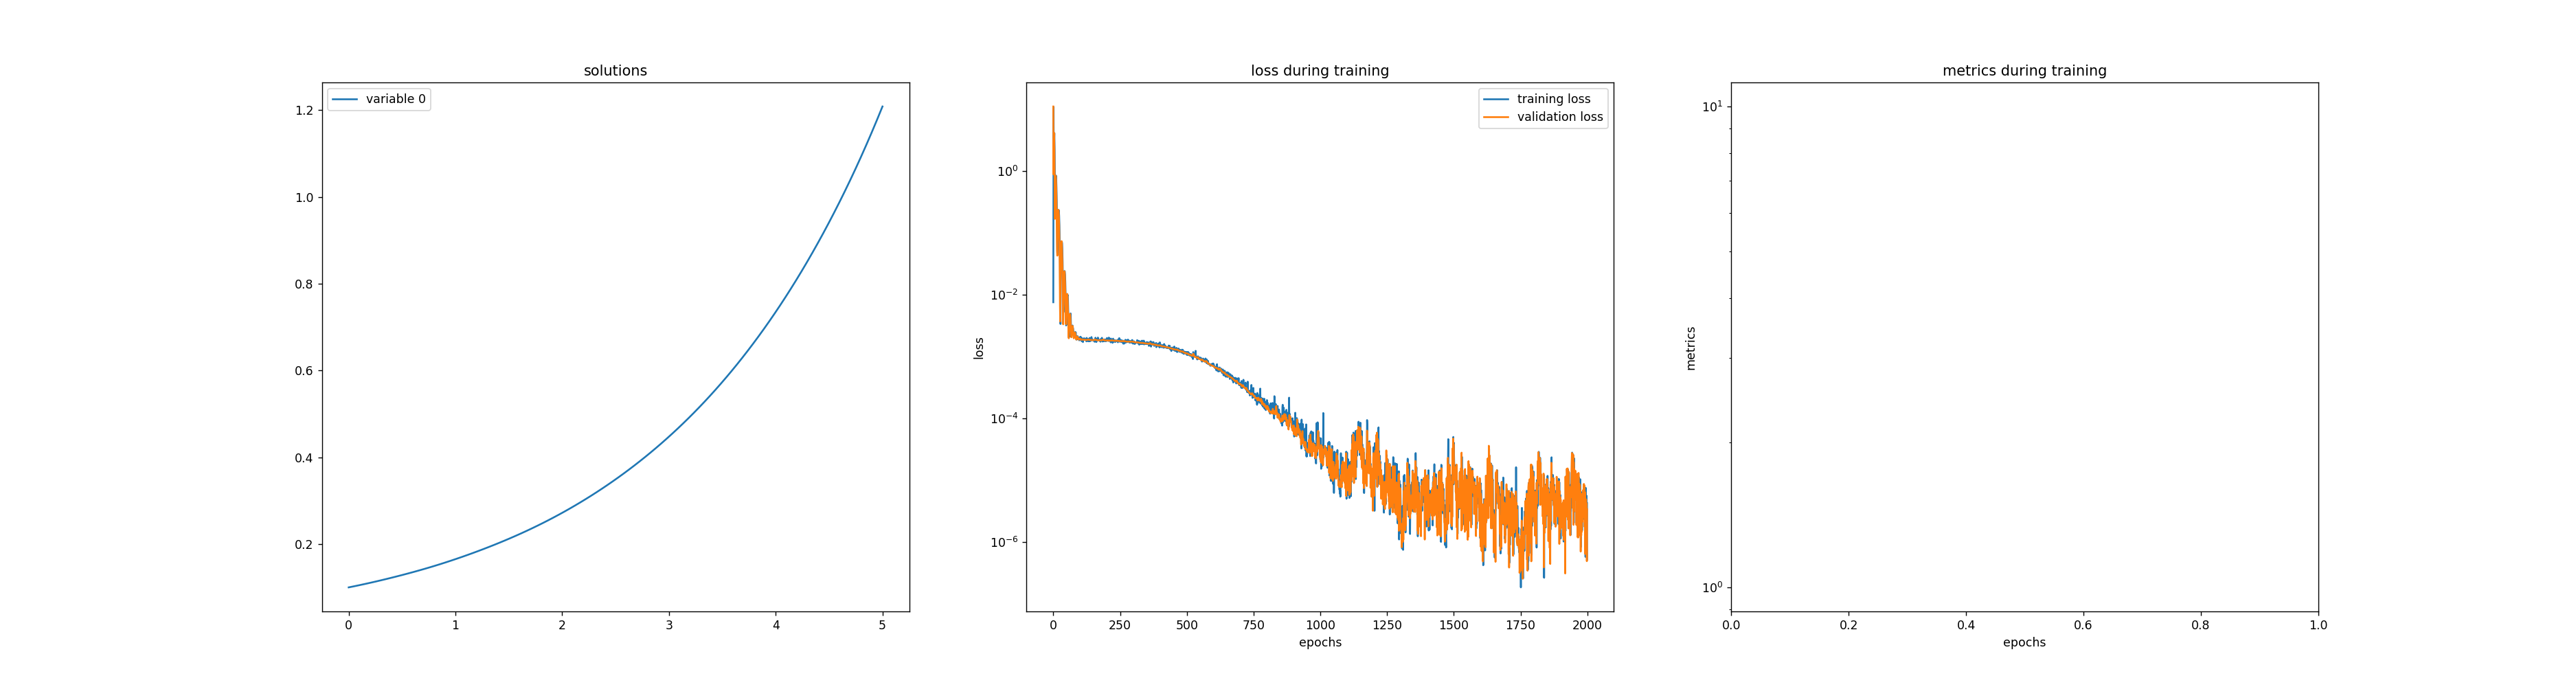

In [3]:
%matplotlib notebook
monitor = Monitor1D(t_min=0.0, t_max=5.0, check_every=100)
monitor_callback = MonitorCallback(monitor)

solver_exponential.fit(max_epochs=2000, callbacks=[monitor_callback])
solution_exponential = solver_exponential.get_solution()

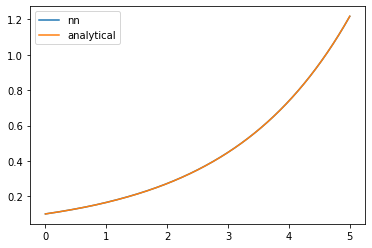

In [4]:
t = np.linspace(0, 5, 10000)
s = solution_exponential(t, to_numpy=True)

%matplotlib inline
plt.plot(t, s, label='nn')
plt.plot(t, u_0*np.exp(l*t), label='analytical')
plt.legend()
plt.show()

In [5]:
### Not working: Same code except l=1 instead of l=0.5 above

l = 1
u_0 = 0.1


def ode_exponential(u, t):
    return [diff(u, t) - l*u,]

condition = [IVP(t_0=0, u_0=u_0),]

net = [FCNN(
    n_input_units=1,
    n_output_units=1,
    hidden_units=(1024,1024),
    actv=torch.nn.Tanh
),]

solver_exponential = Solver1D(
    ode_system=ode_exponential,
    conditions=condition,
    t_min=0.0,
    t_max=5.0,
    nets=net
)

<IPython.core.display.Javascript object>


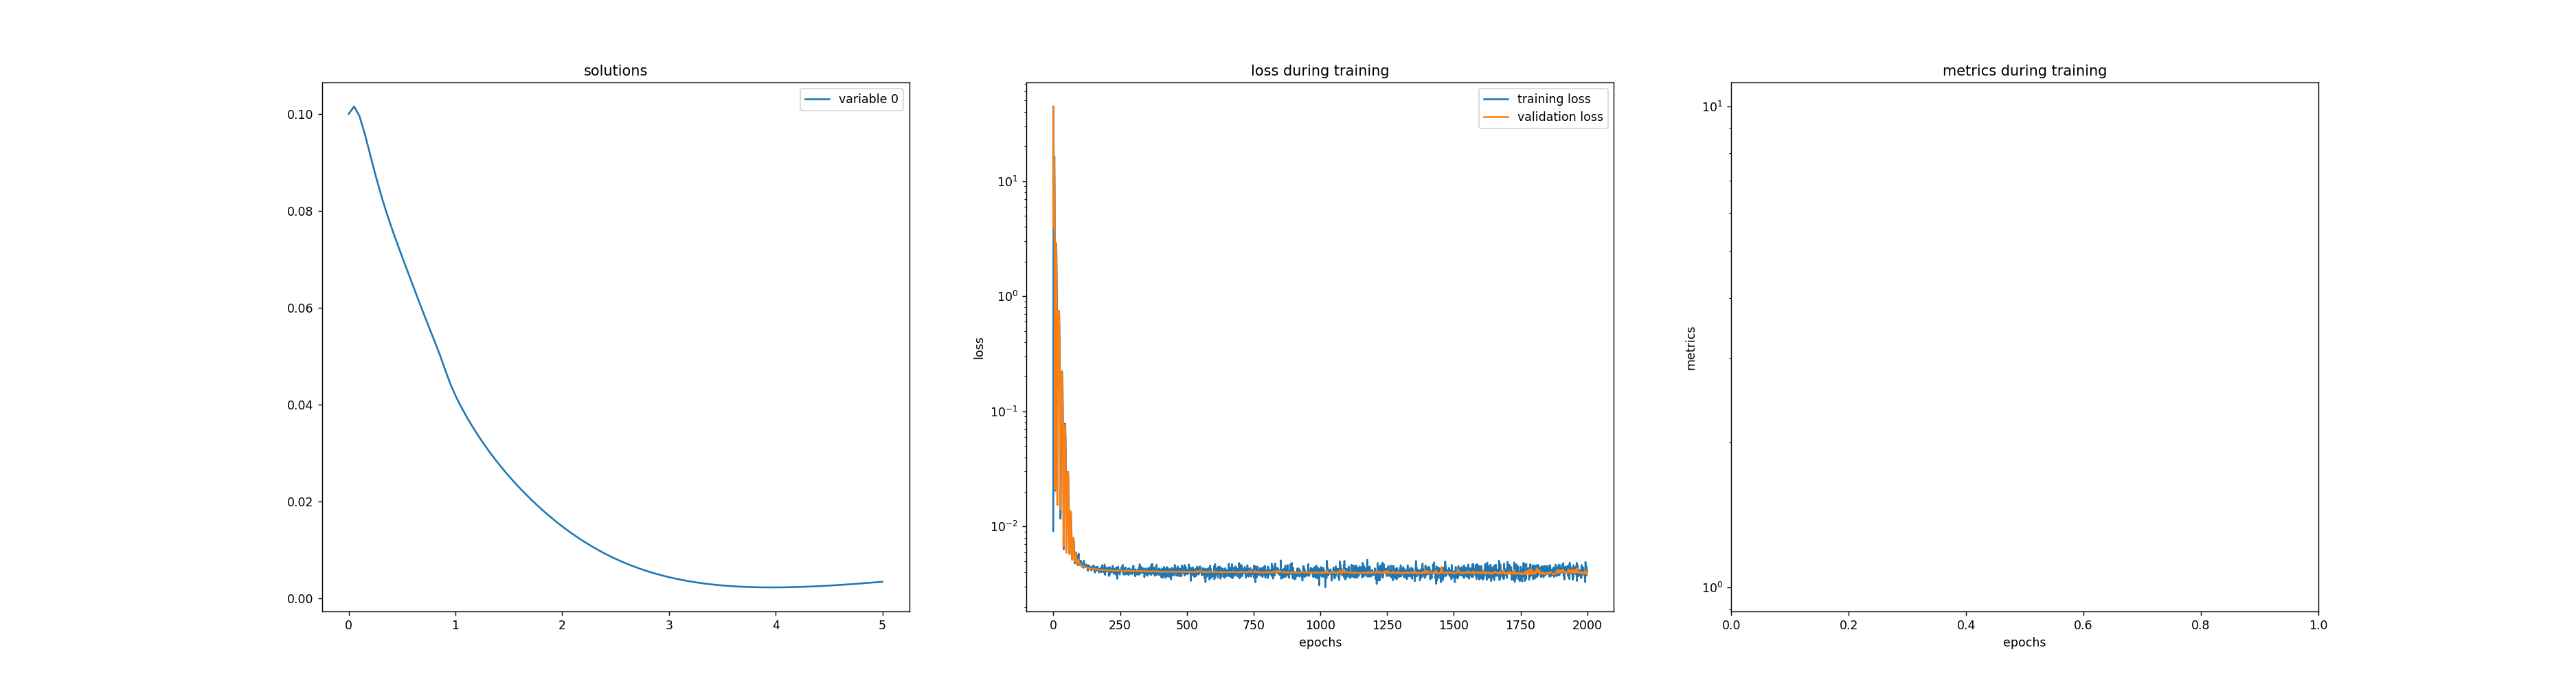

In [6]:
%matplotlib notebook
monitor = Monitor1D(t_min=0.0, t_max=5.0, check_every=100)
monitor_callback = MonitorCallback(monitor)

solver_exponential.fit(max_epochs=2000, callbacks=[monitor_callback])
solution_exponential = solver_exponential.get_solution()

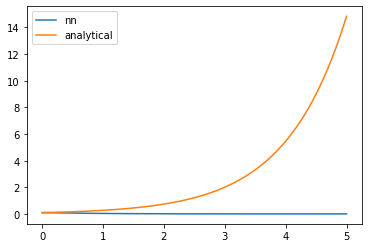

In [7]:
t = np.linspace(0, 5, 10000)
s = solution_exponential(t, to_numpy=True)

%matplotlib inline
plt.plot(t, s, label='nn')
plt.plot(t, u_0*np.exp(l*t), label='analytical')
plt.legend()
plt.show()

In [ ]:
torch.save(solution_exponential.nets[0].state_dict(), 'exponential.hdf5')

model = FCNN(
    n_input_units=1,
    n_output_units=1,
    hidden_units=(1024,),
    actv=torch.nn.Tanh
)

model.load_state_dict(torch.load('exponential.hdf5'))
model.eval()

In [ ]:
t = 2.0
t0 = 0.0
u0 = 5.0
output = u0 + (1 - np.exp(-1*(t-t0)))*model.forward(torch.tensor([t])) 
output

In [ ]:
solution_exponential(t)

## 2. 2nd Order Linear ODE (IVP)

In [8]:
w_squared = 1

def ode_harmonic(u, t):
    return [diff(u, t, order=2) + w_squared*u,]

condition_harmonic = [IVP(t_0=0, u_0=0, u_0_prime=1),]

net = [FCNN(
    n_input_units=1,
    n_output_units=1,
    hidden_units=(1024,1024),
    actv=torch.nn.Tanh
),]

solver_harmonic = Solver1D(
    ode_system=ode_harmonic,
    conditions=condition_harmonic,
    t_min=0.0,
    t_max=2*np.pi,
    nets=net
)

<IPython.core.display.Javascript object>


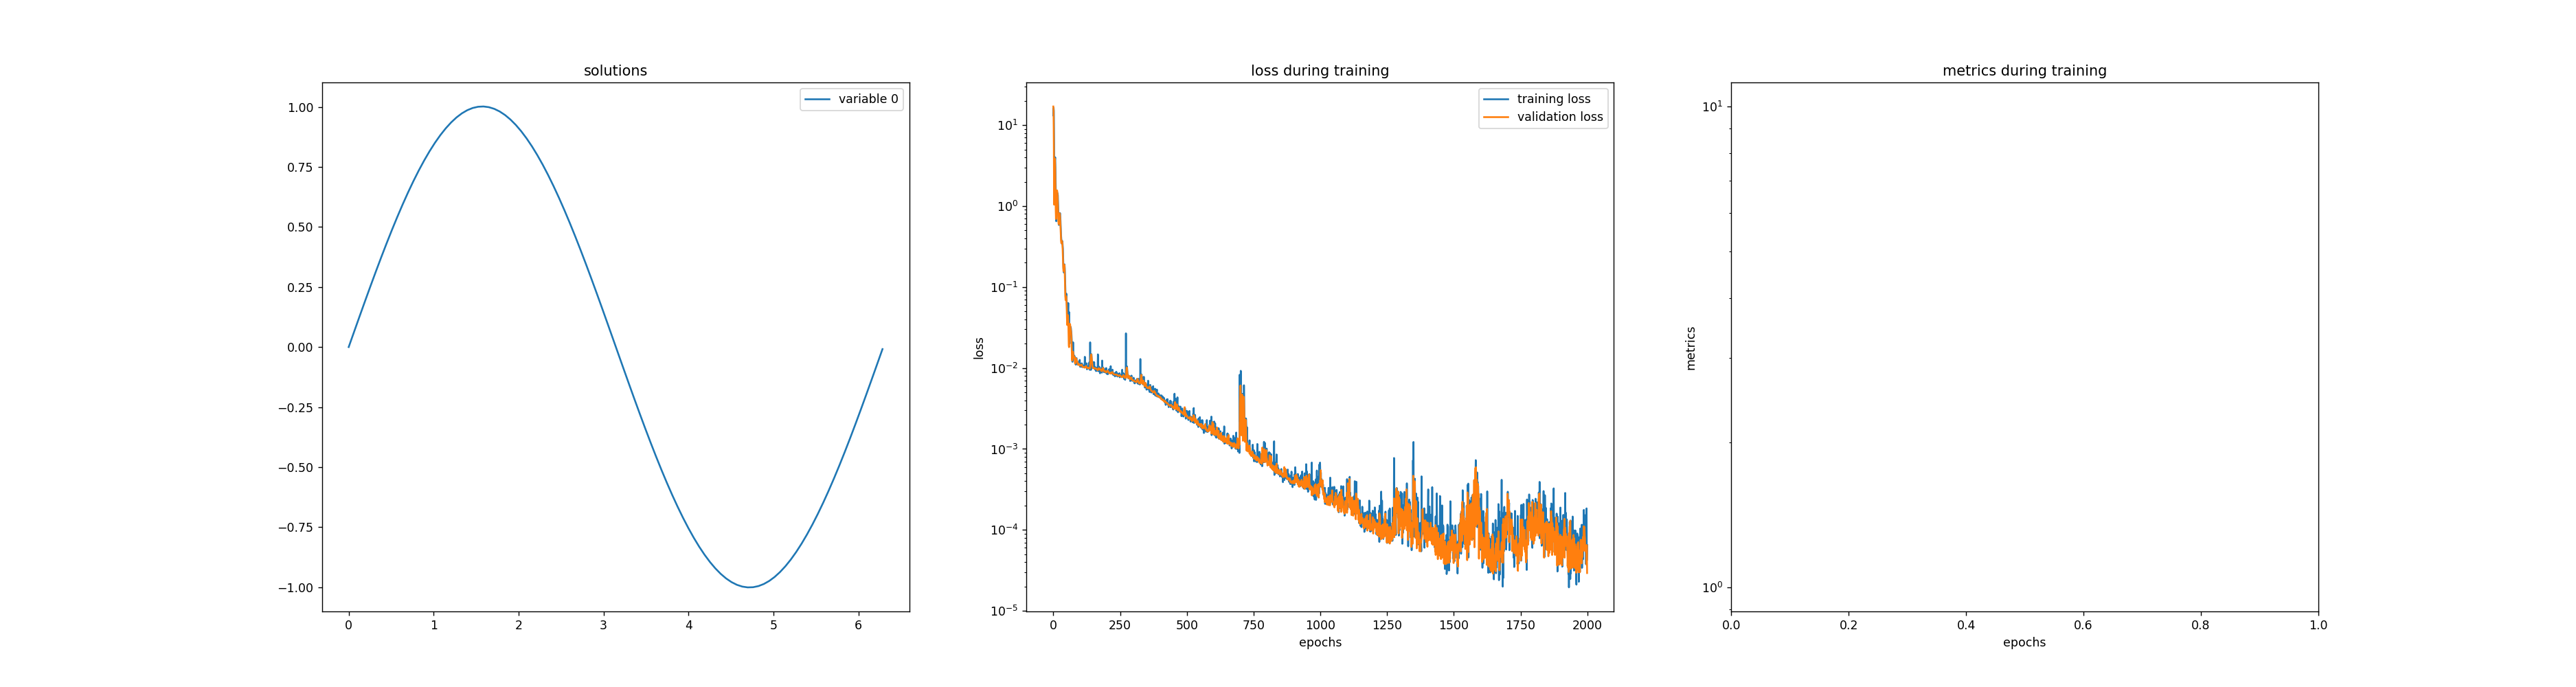

In [9]:
%matplotlib notebook
monitor = Monitor1D(t_min=0.0, t_max=2*np.pi, check_every=100)
monitor_callback = MonitorCallback(monitor)

solver_harmonic.fit(max_epochs=2000, callbacks=[monitor_callback])
solution_harmonic = solver_harmonic.get_solution()

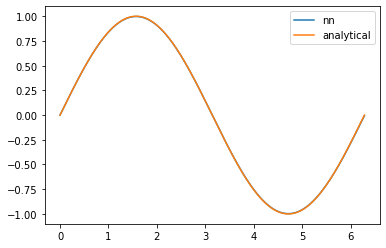

In [10]:
t = np.linspace(0, 2*np.pi, 10000)
s = solution_harmonic(t, to_numpy=True)

%matplotlib inline
plt.plot(t, s, label='nn')
plt.plot(t, np.sin(t), label='analytical')
plt.legend()
plt.show()

## 3. Logistic Equation : 1st Order Non Linear IVP

In [11]:
gamma = 1
M = 1
u_0 = 0.5

def ode_logistic(u, t):
    return [diff(u, t) - gamma*u*(M-u),]

condition_logistic = [IVP(t_0=0, u_0=u_0),]

net = [FCNN(
    n_input_units=1,
    n_output_units=1,
    hidden_units=(2048,),
    actv=torch.nn.Tanh
),]

solver_logistic = Solver1D(
    ode_system=ode_logistic,
    conditions=condition_logistic,
    t_min=0.0,
    t_max=5.0,
    nets=net
)

<IPython.core.display.Javascript object>


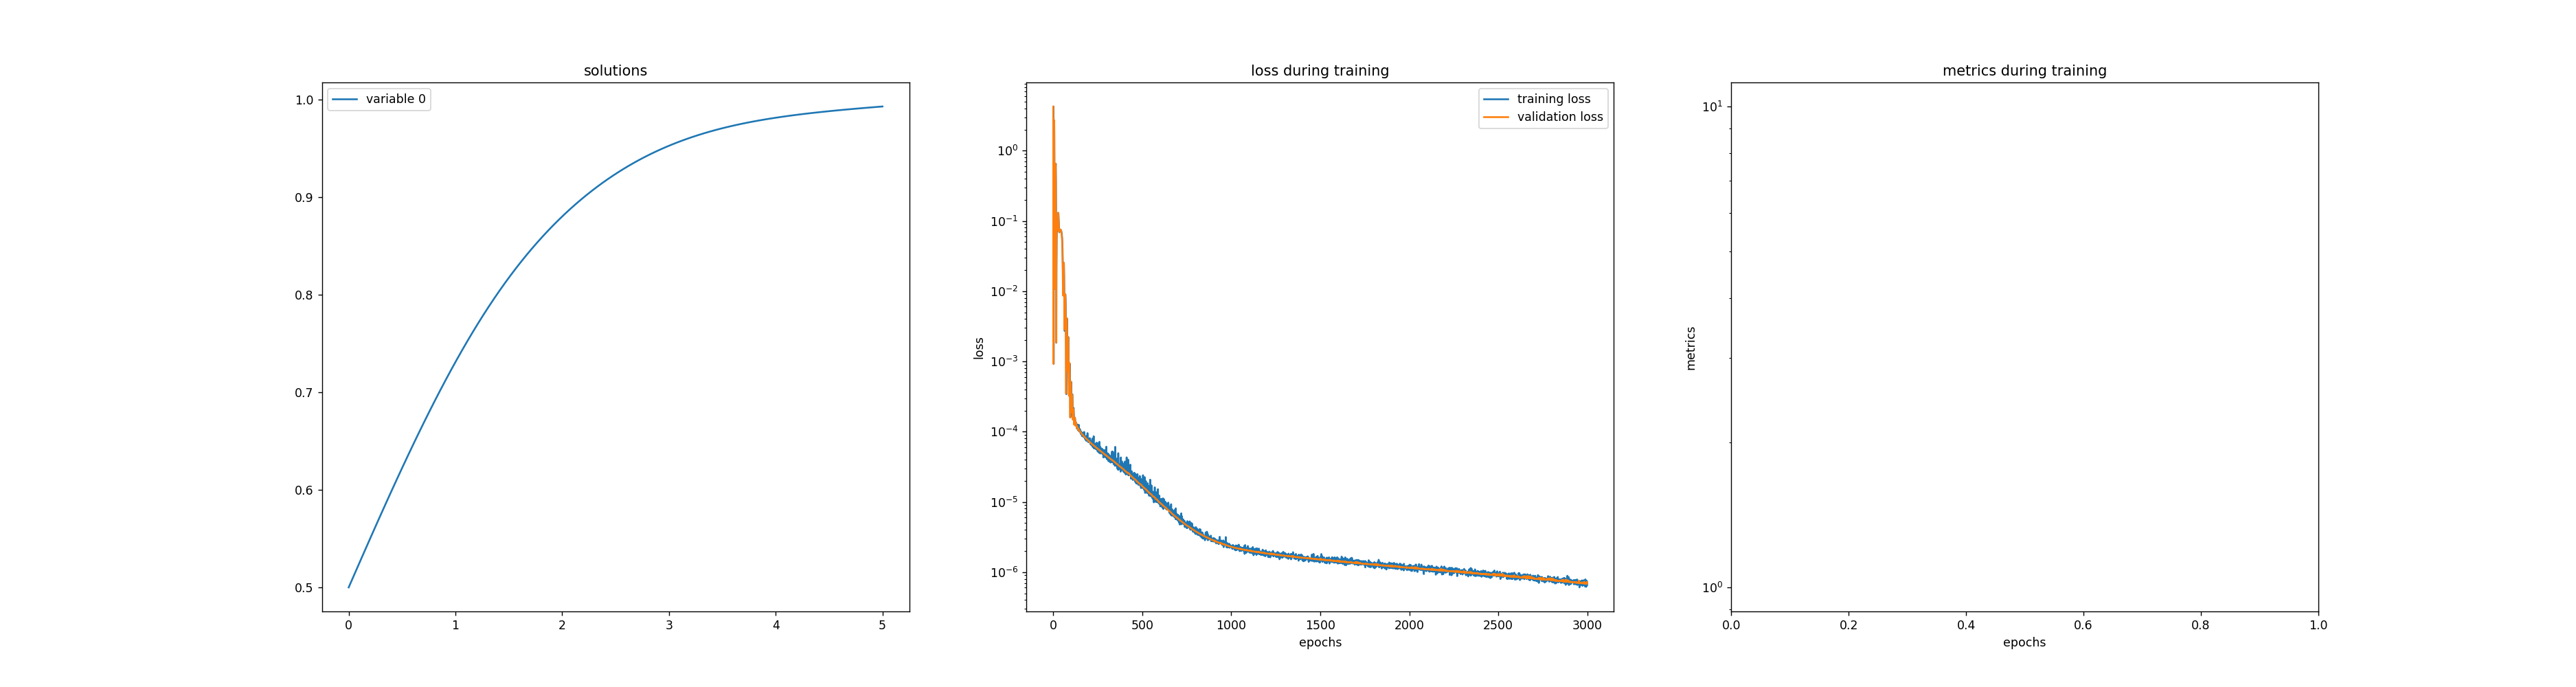

In [12]:
%matplotlib notebook
monitor = Monitor1D(t_min=0.0, t_max=5.0, check_every=100)
monitor_callback = MonitorCallback(monitor)

solver_logistic.fit(max_epochs=3000, callbacks=[monitor_callback])
solution_logistic = solver_logistic.get_solution()

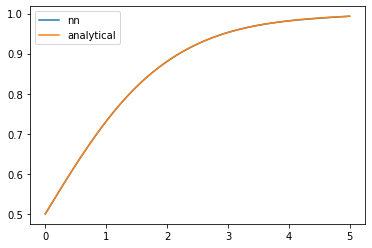

In [14]:
t = np.linspace(0, 5.0, 10000)
s = solution_logistic(t, to_numpy=True)

%matplotlib inline
plt.plot(t, s, label='nn')
plt.plot(t, 1/(1 + np.exp(-t)), label='analytical')
plt.legend()
plt.show()

## 1st Order System of Equations (Non autonomous system)

In [15]:
def ode_system(u, v, t):
    return [
        diff(u, t) + t*v,
        diff(v, t) - t*u
    ]

condition_system = [IVP(t_0=0, u_0=0), IVP(t_0=0, u_0=1)]

net_system = [FCNN(
    n_input_units=1,
    n_output_units=1,
    hidden_units=(1024,1024),
    actv=torch.nn.Tanh
),
    FCNN(
    n_input_units=1,
    n_output_units=1,
    hidden_units=(1024,1024),
    actv=torch.nn.Tanh
),]

solver_system = Solver1D(
    ode_system=ode_system,
    conditions=condition_system,
    t_min=0.0,
    t_max=3.0,
    nets=net_system
)

<IPython.core.display.Javascript object>


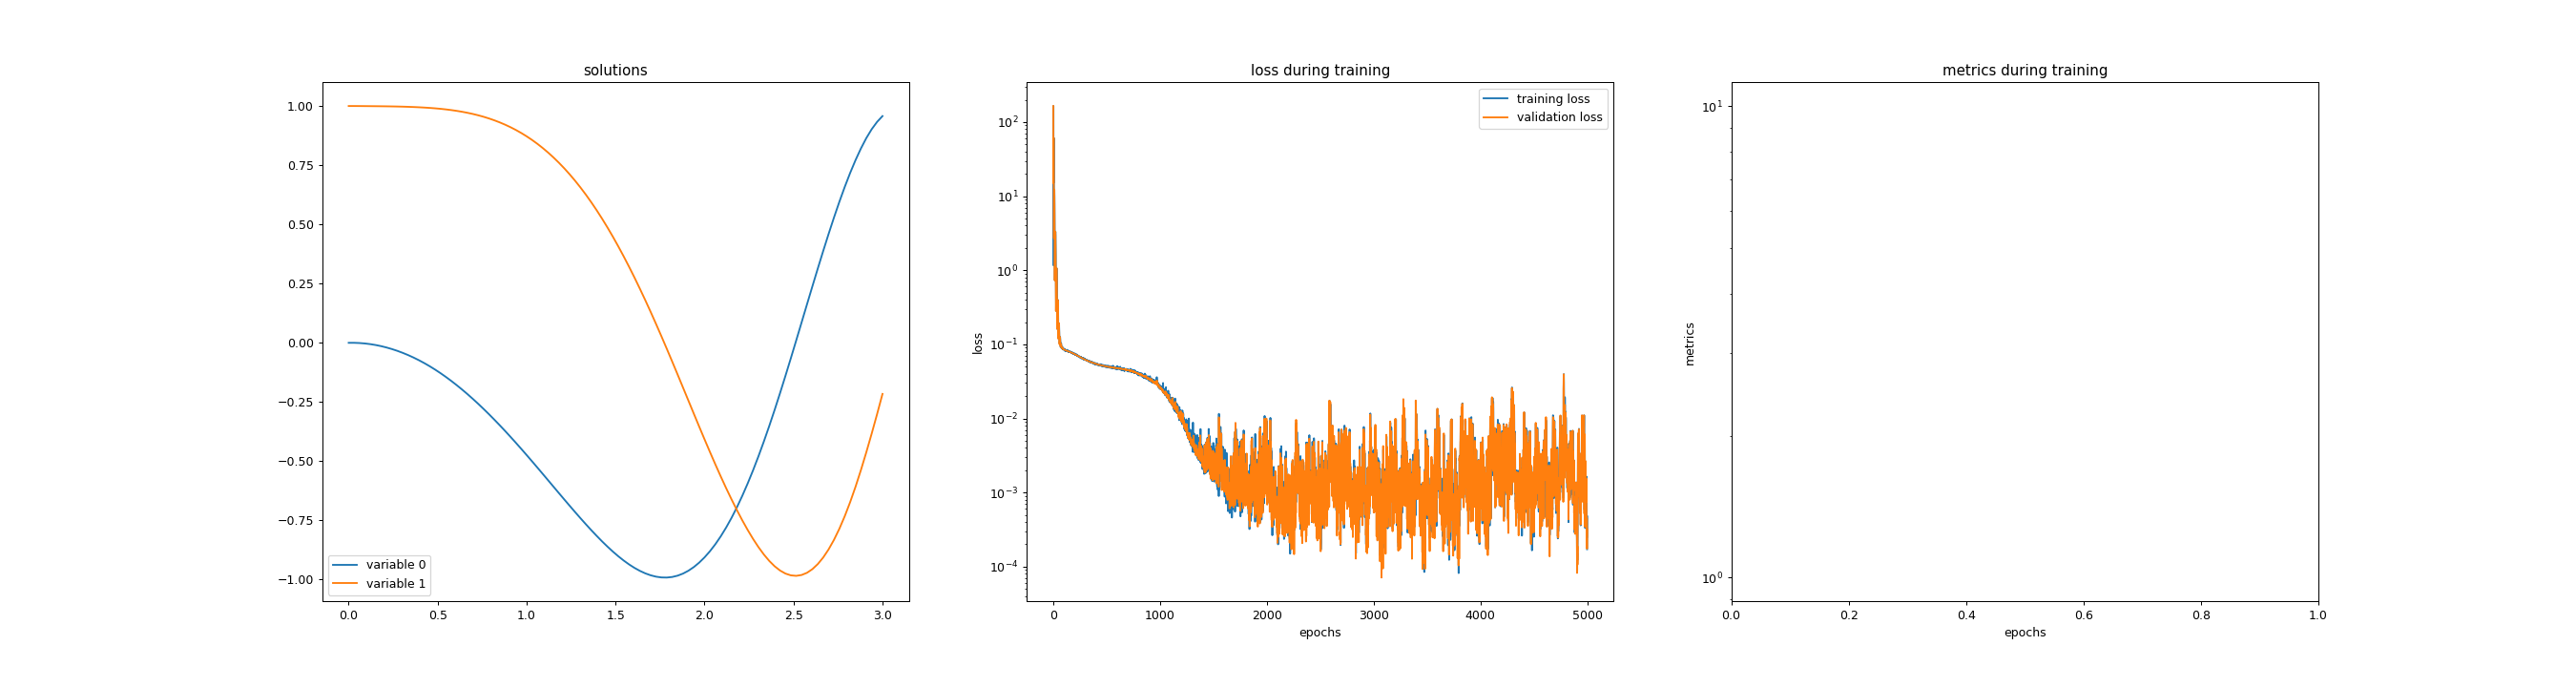

In [16]:
%matplotlib notebook
monitor = Monitor1D(t_min=0.0, t_max=3.0, check_every=100)
monitor_callback = MonitorCallback(monitor)

solver_system.fit(max_epochs=5000, callbacks=[monitor_callback])
solution_system = solver_system.get_solution()

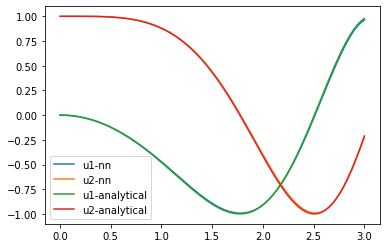

In [17]:
t = np.linspace(0, 3.0, 10000)
s_u, s_v = solution_system(t, to_numpy=True)

%matplotlib inline
plt.plot(t, s_u, label='u1-nn')
plt.plot(t, s_v, label='u2-nn')
plt.plot(t, -1*np.sin(t**2/2), label='u1-analytical')
plt.plot(t, np.cos(t**2/2), label='u2-analytical')
plt.legend()
plt.show()

## Laplace Equation

In [18]:
def pde_laplace(u, x, y):
    return [diff(u, x, order=2) + diff(u, y, order=2)]

conditions_laplace = [
    DirichletBVP2D(
        x_min=0, x_min_val=lambda y: torch.sin(np.pi*y),
        x_max=1, x_max_val=lambda y: 0,
        y_min=0, y_min_val=lambda x: 0,
        y_max=1, y_max_val=lambda x: 0,
    )
]

nets_laplace = [
        FCNN(
        n_input_units=2,
        n_output_units=1,
        hidden_units=(1024,),
        actv=torch.nn.Tanh
    ),
]

monitor_laplace = Monitor2D(check_every=10, xy_min=(0, 0), xy_max=(1, 1))
monitor_callback = MonitorCallback(monitor_laplace)

solver_laplace = Solver2D(
    pde_system=pde_laplace,
    conditions=conditions_laplace,
    nets=nets_laplace,
    xy_min=(0, 0),  
    xy_max=(1, 1), 
    train_generator=Generator2D((32, 32), (0, 0), (1, 1), method='equally-spaced-noisy'),
    valid_generator=Generator2D((32, 32), (0, 0), (1, 1), method='equally-spaced'),
)

<IPython.core.display.Javascript object>


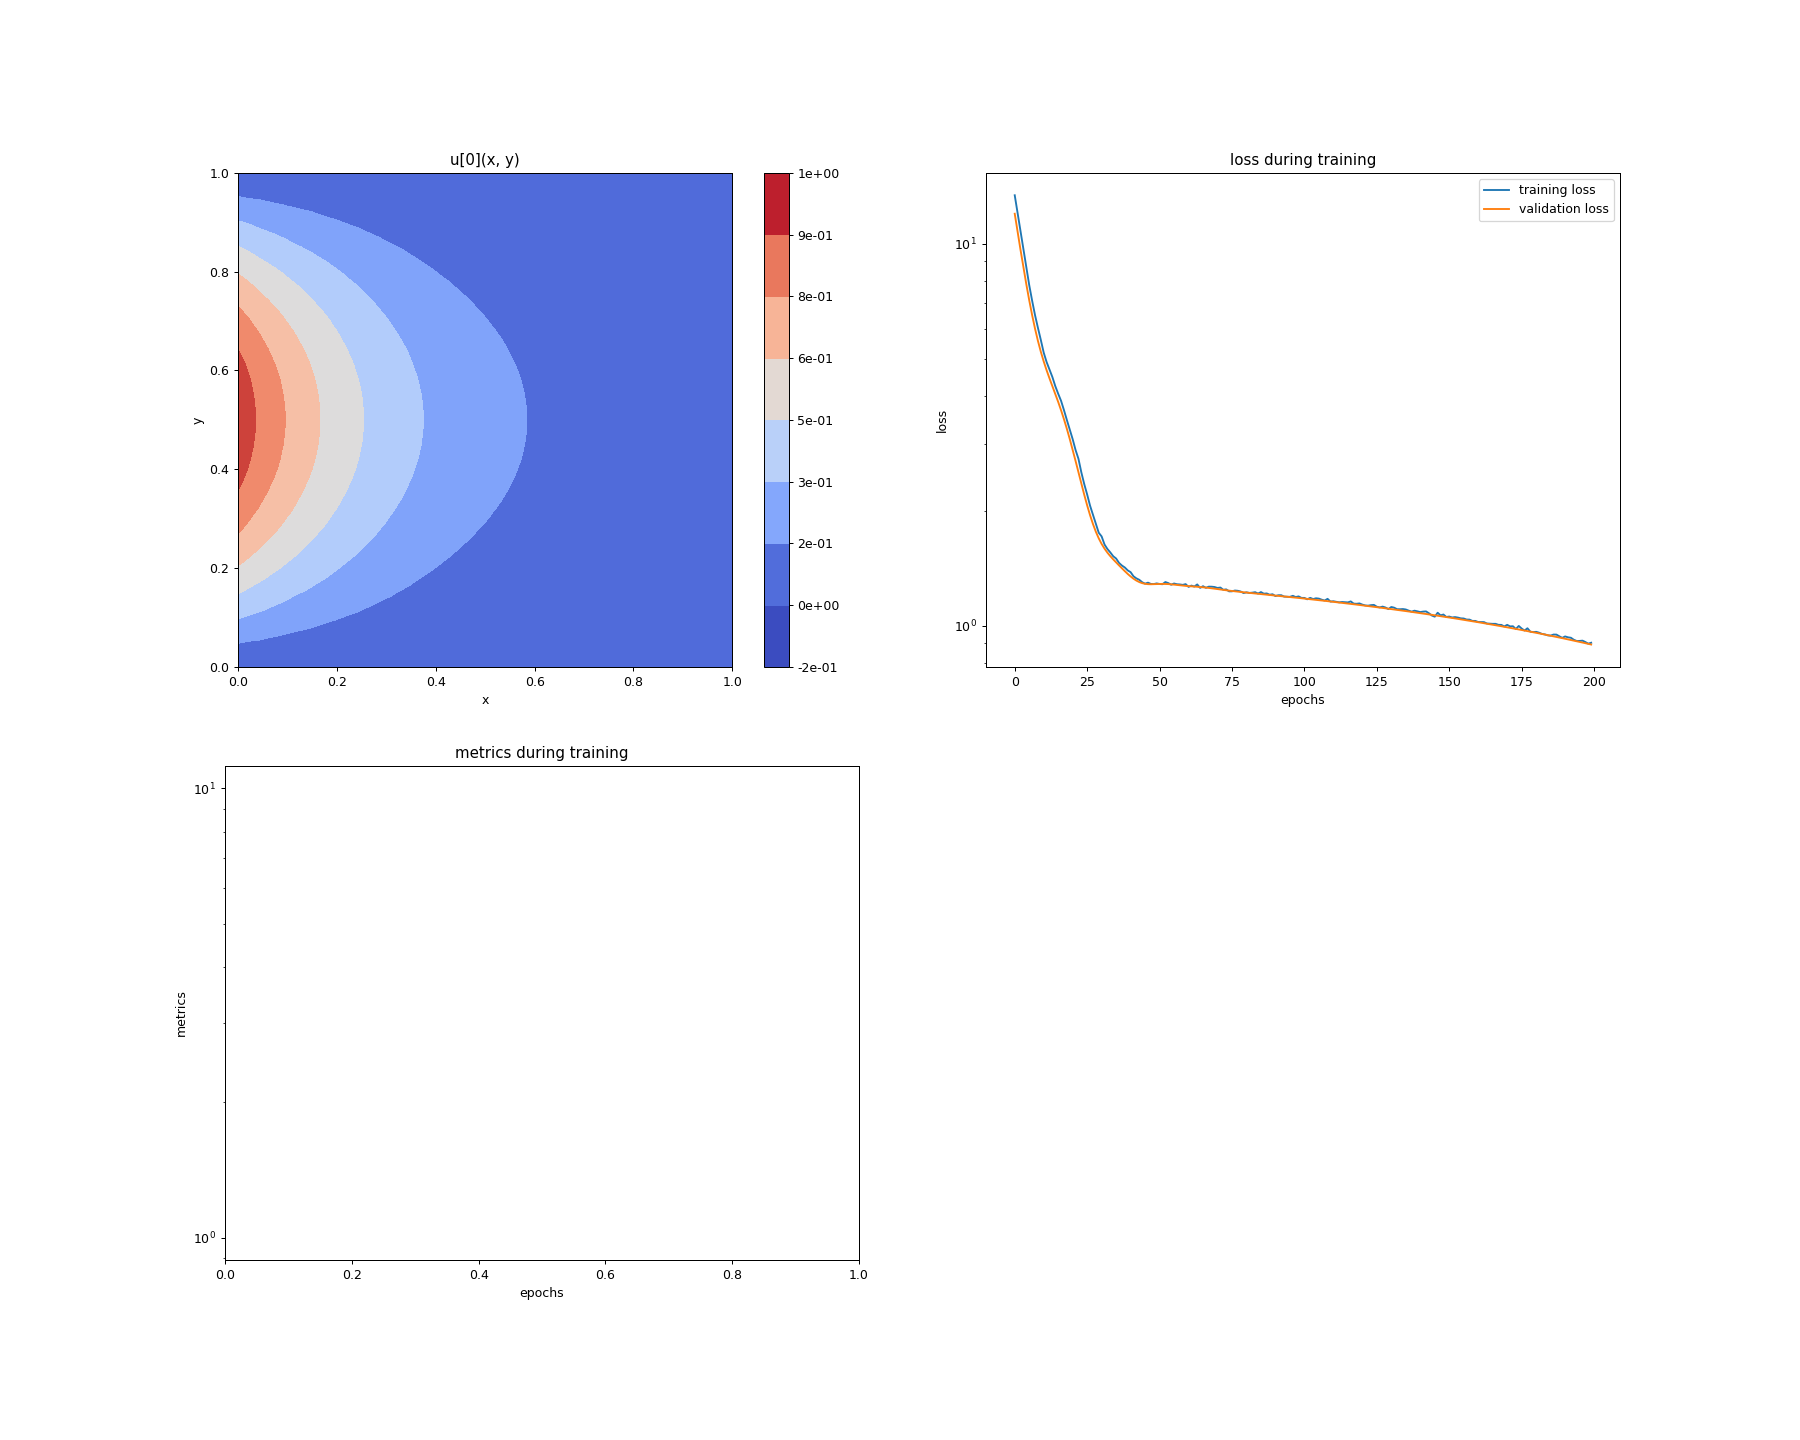

In [19]:
%matplotlib notebook
monitor_laplace = Monitor2D(check_every=10, xy_min=(0, 0), xy_max=(1, 1))
monitor_callback = MonitorCallback(monitor_laplace)

solver_laplace.fit(max_epochs=200, callbacks=[monitor_callback])
solution_neural_net_laplace = solver_laplace.get_solution()

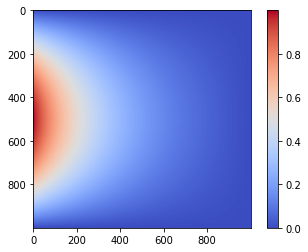

In [21]:
%matplotlib inline
x_r = np.linspace(0.0, 1.0, 1000)
y_r = np.linspace(0.0, 1.0, 1000)

u_ana = np.zeros((1000, 1000))

index1 = 999
index2 = 0

for i in x_r:
    for j in y_r:
        u_ana[index1, index2] = np.sin(np.pi*i)*np.sinh(np.pi*(1-j))/np.sinh(np.pi)
        index2 += 1
    index1 -= 1
    index2 = 0

plt.imshow(u_ana, cmap='coolwarm')
plt.colorbar()
plt.show()

In [ ]:
torch.save(solution_neural_net_laplace.nets[0].state_dict(), 'laplace.hdf5')

model = FCNN(n_input_units=2, n_output_units=1, hidden_units=[512])

model.load_state_dict(torch.load('laplace.hdf5'))
model.eval()

In [ ]:
x = 0.5
y = 0.5

u = (1-x)*np.sin(np.pi*y) + x*(1-x)*y*(1-y)*model(torch.tensor([x,y]))
u

In [ ]:
solution_neural_net_laplace(x,y)

## Poisson Equation

In [22]:
def pde_poisson(u, x, y):
    return [diff(u, x, order=2) + diff(u, y, order=2) + 2*(y - y**2) + 2*(x - x**2)]

conditions_poisson = [
    DirichletBVP2D(
        x_min=0, x_min_val=lambda y: 0,
        x_max=1, x_max_val=lambda y: 0,
        y_min=0, y_min_val=lambda x: 0,
        y_max=1, y_max_val=lambda x: 0,
    )
]

nets_poisson = [
    FCNN(n_input_units=2, n_output_units=1, hidden_units=[512])
]

monitor_poisson = Monitor2D(check_every=10, xy_min=(0, 0), xy_max=(1, 1))
monitor_callback = MonitorCallback(monitor_poisson)

solver_poisson = Solver2D(
    pde_system=pde_poisson,
    conditions=conditions_poisson,
    nets=nets_poisson,
    xy_min=(0, 0),
    xy_max=(1, 1),
    train_generator=Generator2D((32, 32), (0, 0), (1, 1), method='equally-spaced-noisy'),
    valid_generator=Generator2D((32, 32), (0, 0), (1, 1), method='equally-spaced'),
)

<IPython.core.display.Javascript object>


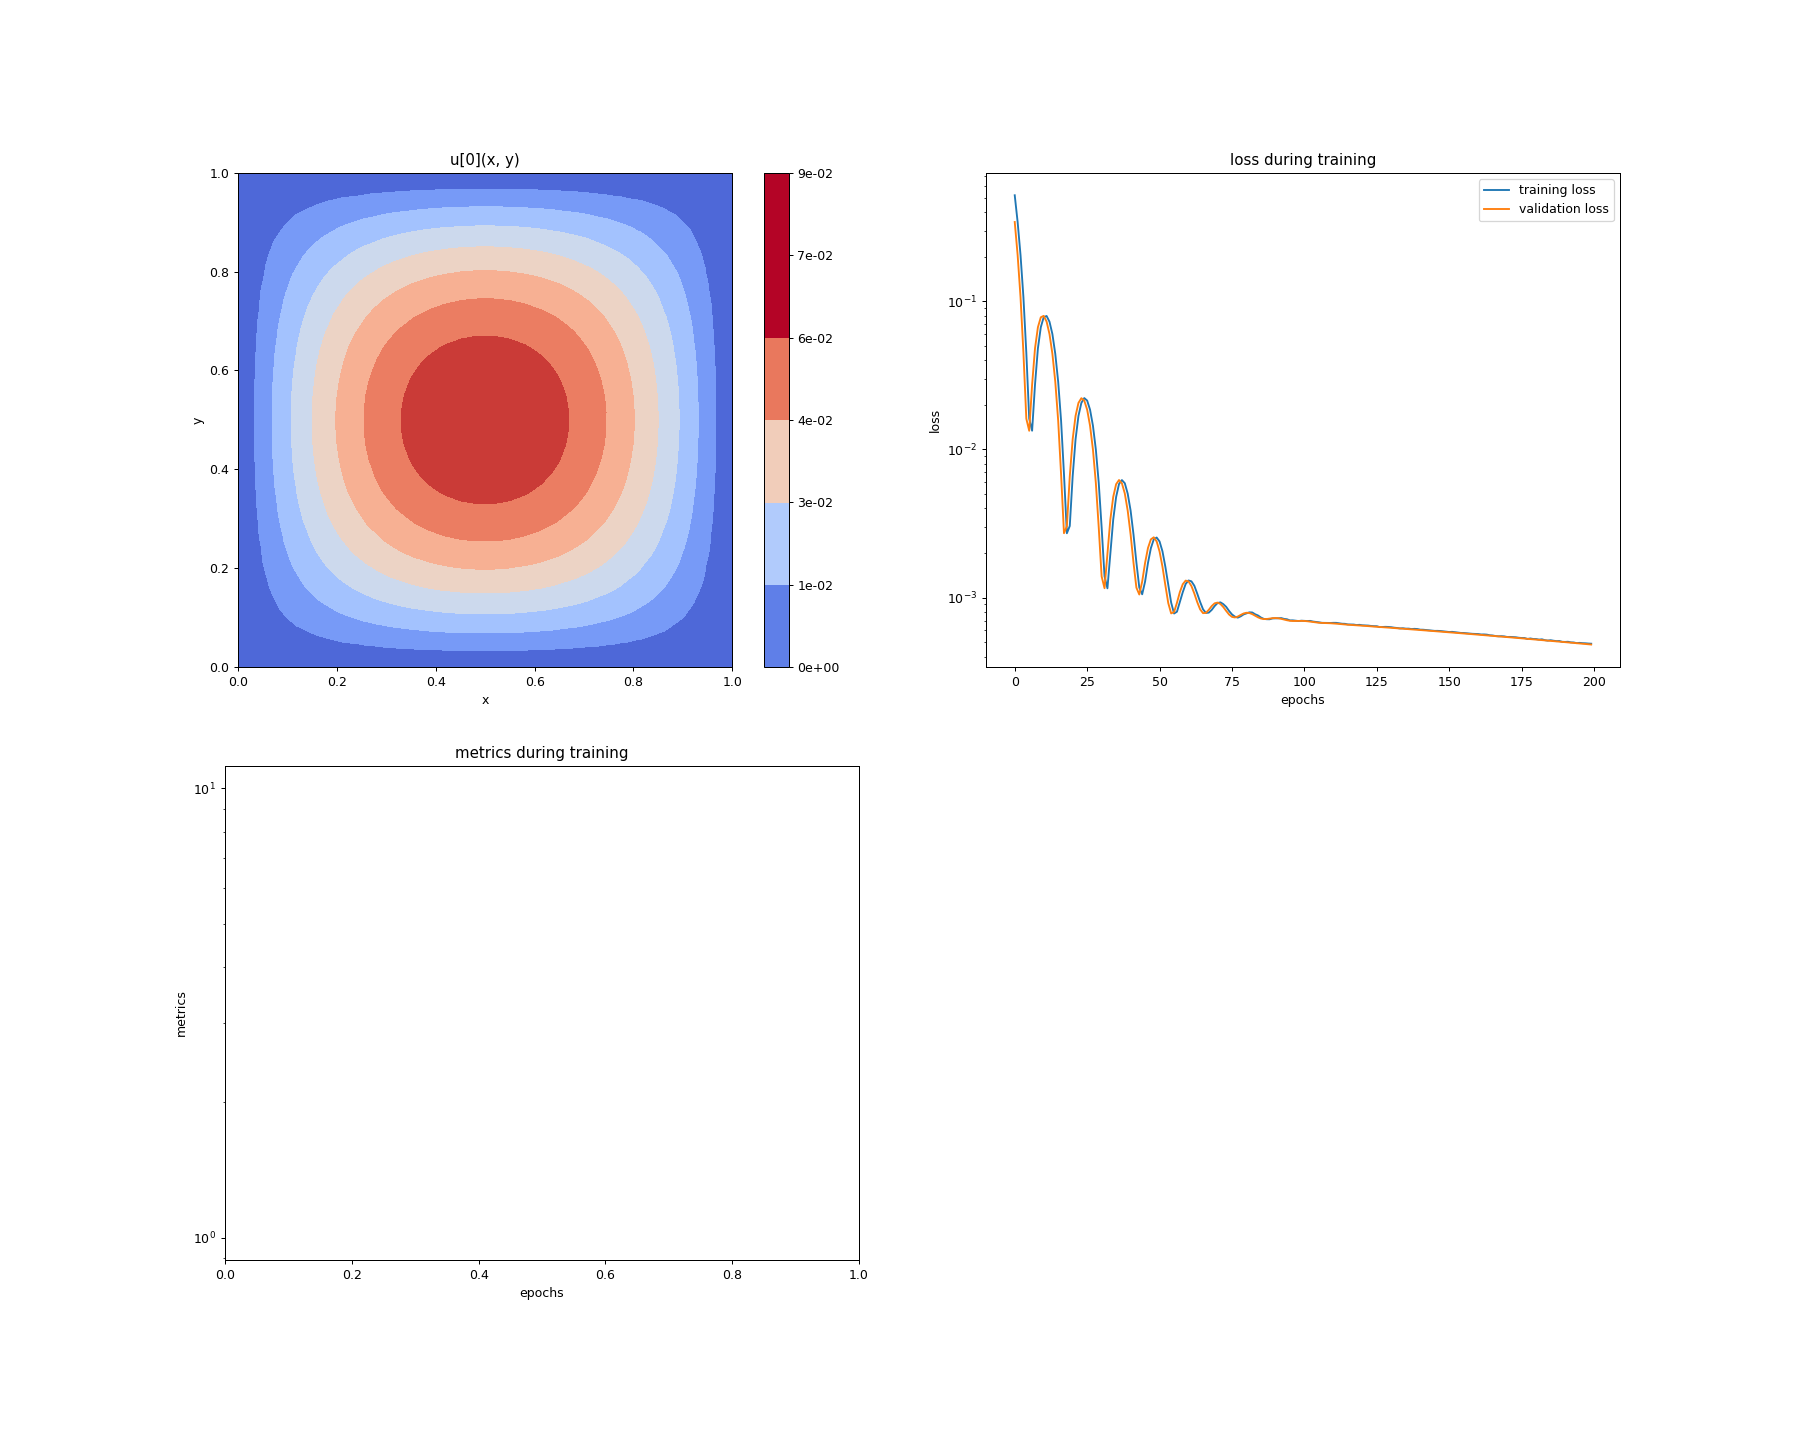

In [23]:
%matplotlib notebook
monitor_poisson = Monitor2D(check_every=10, xy_min=(0, 0), xy_max=(1, 1))
monitor_callback = MonitorCallback(monitor_poisson)

solver_poisson.fit(max_epochs=200, callbacks=[monitor_callback])
solution_neural_net_poisson = solver_poisson.get_solution()

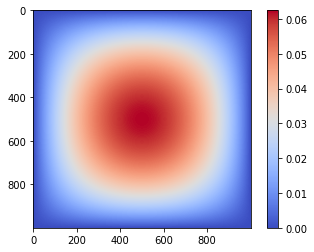

In [24]:
%matplotlib inline
x_r = np.linspace(0.0, 1.0, 1000)
y_r = np.linspace(0.0, 1.0, 1000)

u_ana = np.zeros((1000, 1000))

index1 = 999
index2 = 0

for i in x_r:
    for j in y_r:
        u_ana[index1, index2] = (1-j)*j*(1-i)*i
        index2 += 1
    index1 -= 1
    index2 = 0

plt.imshow(u_ana, cmap='coolwarm')
plt.colorbar()
plt.show()

## Heat Equation

In [28]:
L = 2
T = 3

def pde_heat(u, x, t):
    return [diff(u, t) - diff(u, x, order=2)]

conditions_heat=[
    IBVP1D(
        t_min=0, t_min_val=lambda x: torch.sin(np.pi*x/L),
        x_min=0, x_min_prime=lambda t: 0,
        x_max=L, x_max_prime=lambda t: 0
    )
]


nets_heat= [
    FCNN(n_input_units=2, n_output_units=1, hidden_units=(32, 32,))
]


solver_heat = Solver2D(
    pde_system=pde_heat,
    conditions=conditions_heat,
    nets=nets_heat,
    xy_min=(0, 0), 
    xy_max=(L, T),  
    train_generator=Generator2D((32, 32), (0, 0), (L, T), method='equally-spaced-noisy'),
    valid_generator=Generator2D((32, 32), (0, 0), (L, T), method='equally-spaced'),
)

<IPython.core.display.Javascript object>


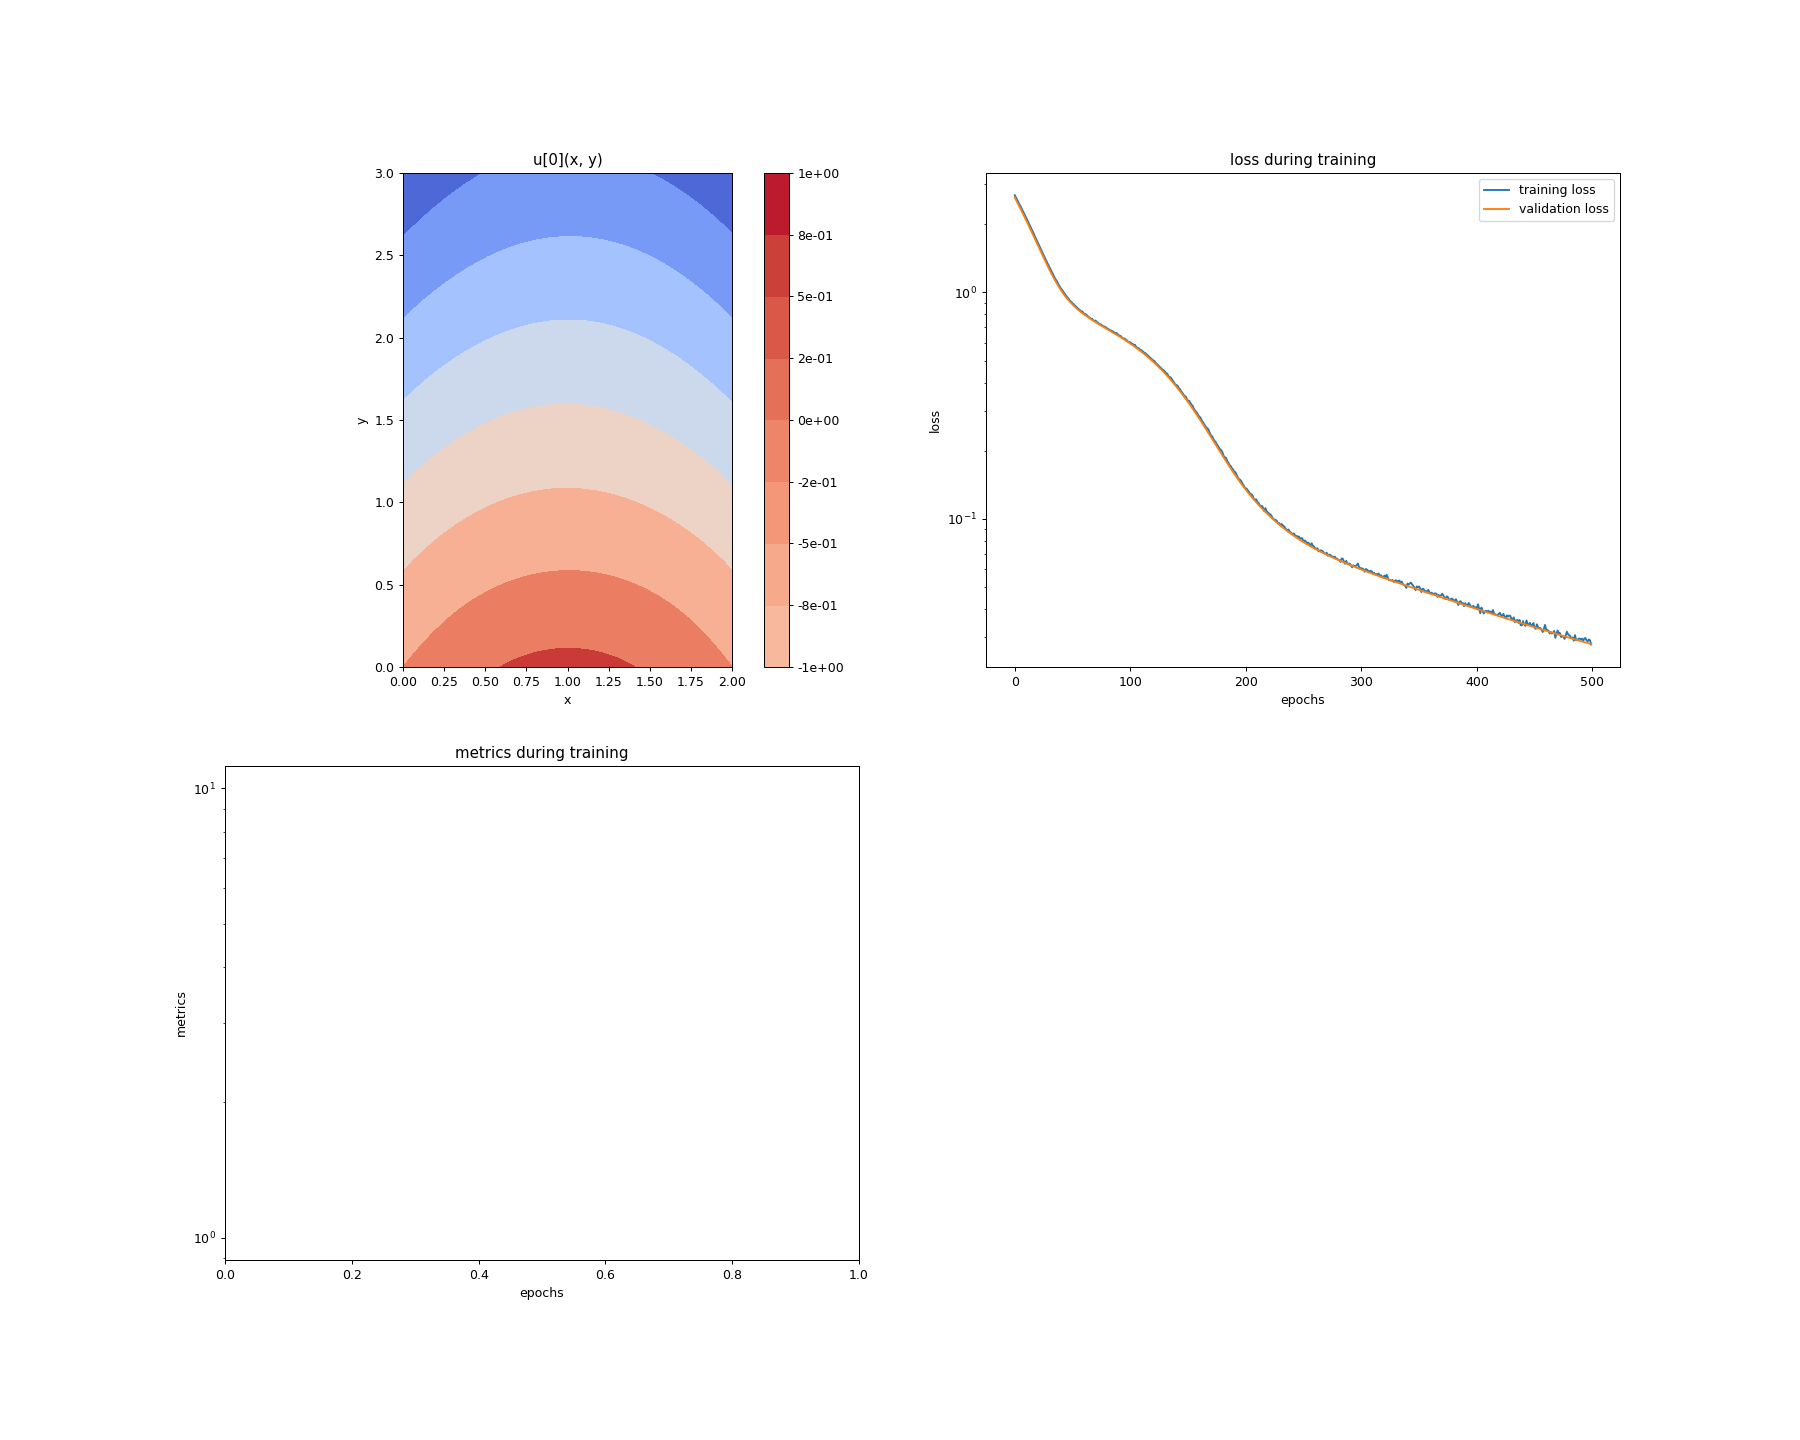

In [29]:
%matplotlib notebook
monitor_poisson = Monitor2D(check_every=10, xy_min=(0, 0), xy_max=(L, T))
monitor_callback = MonitorCallback(monitor_poisson)

solver_heat.fit(max_epochs=500, callbacks=[monitor_callback])
solution_neural_net_heat = solver_heat.get_solution()

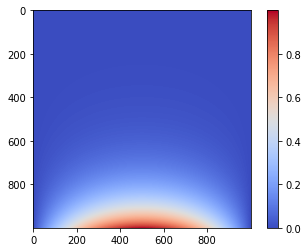

In [30]:
%matplotlib inline
x_r = np.linspace(0.0, 2.0, 1000)
t_r = np.linspace(0.0, 3.0, 1000)

u_ana = np.zeros((1000, 1000))

index1 = 999
index2 = 0

for i in t_r:
    for j in x_r:
        u_ana[index1, index2] = np.sin(np.pi*j/L)*np.exp(-np.pi**2*i/L**2)
        index2 += 1
    index1 -= 1
    index2 = 0

plt.imshow(u_ana, cmap='coolwarm')
plt.colorbar()
plt.show()